In [1]:
import ee
import geemap
import matplotlib as plt
ee.Authenticate
ee.Initialize(project='ee-gy5555386')

##test

In [53]:
import geopandas as gpd
from shapely.geometry import Point
import ee
import matplotlib.pyplot as plt
import requests
import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask

# Initialize the Earth Engine
ee.Initialize()

# Define the point
latitude = -13.647
longitude = -39.491
radius = 33000

point = gpd.GeoDataFrame(geometry=[Point(longitude, latitude)], crs="EPSG:4326")

# Transform the point to EPSG:3857
point = point.to_crs(epsg=3857)

# Create a buffer around the point
circle = point.buffer(radius)

# Transform the buffer back to EPSG:4326
circle = circle.to_crs(epsg=4326)


In [54]:
# Load the Hansen Global Forest Change dataset
dataset = ee.Image('UMD/hansen/global_forest_change_2020_v1_8')

# Select the 'loss' and 'treecover2000' bands
forest_loss = dataset.select('loss')
forest_2000 = dataset.select('treecover2000')


In [55]:
# Function to mask the image using the buffer geometry
def mask_image(image, geometry, crop=True):
    masked_image = image.clip(geometry)
    if crop:
        masked_image = masked_image.updateMask(masked_image)
    return masked_image

# Convert the buffer geometry to an Earth Engine object
buffer_geometry = ee.Geometry.Polygon(circle.geometry[0].__geo_interface__['coordinates'])

# Mask the forest loss data
out_image = mask_image(forest_loss, buffer_geometry, crop=True)


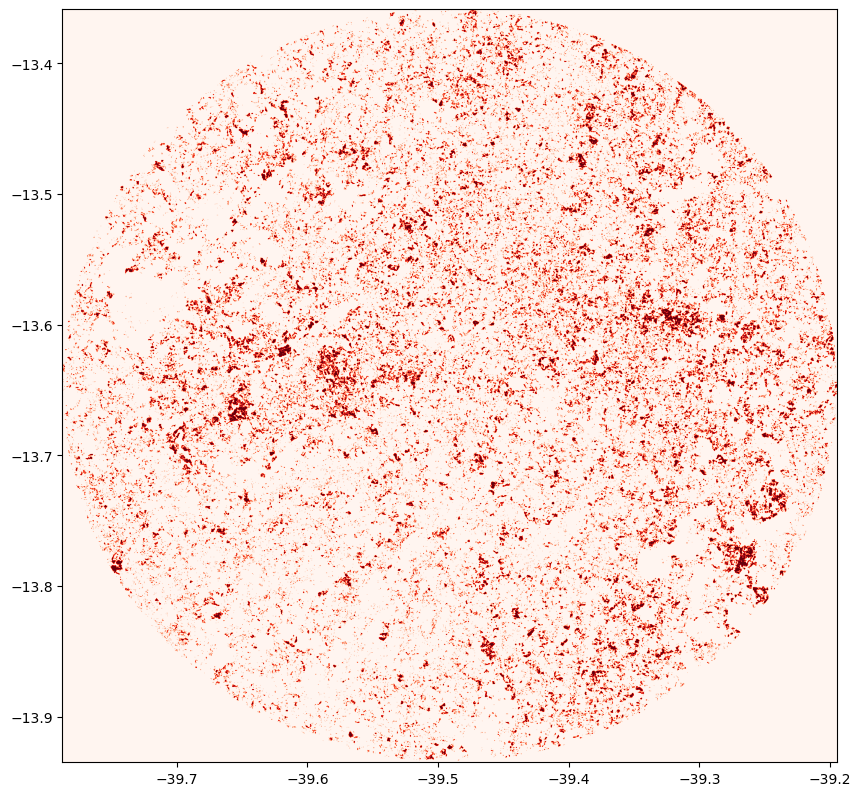

In [56]:
# Define the region to export
region = buffer_geometry.bounds().getInfo()['coordinates']

# Get the URL for the image
url = out_image.getDownloadURL({
    'scale': 30,
    'region': region,
    'format': 'GEO_TIFF'
})

# Download the image as a GeoTIFF file
response = requests.get(url)
with open('forest_loss.tif', 'wb') as file:
    file.write(response.content)

# Open and visualize the image with Rasterio
with rasterio.open('forest_loss.tif') as src:
    out_image, out_transform = mask(src, [circle.geometry[0]], crop=True)

# Plot the image
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
show(out_image, transform=out_transform, ax=ax, cmap='Reds')
plt.show()


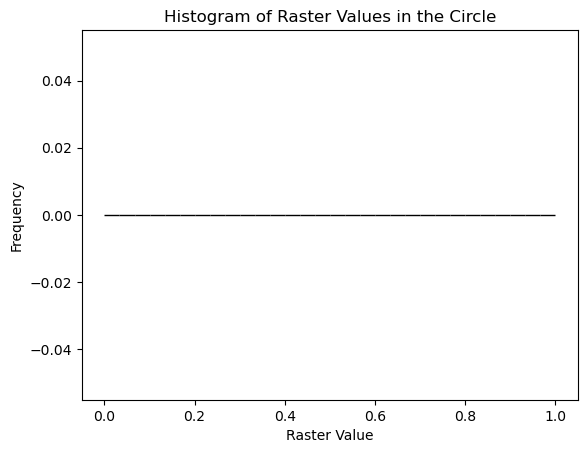

{'type': 'Polygon',
 'coordinates': [[[-13.647000000000002, -39.19403742360112],
   [-13.754042703660849, -39.205807358449135],
   [-13.852665849774953, -39.24019157433085],
   [-13.935089064038225, -39.29448352997042],
   [-13.994768791117787, -39.364401843856335],
   [-14.026913460371015, -39.4444186837508],
   [-14.02887714657266, -39.528188061250965],
   [-14.000396945085194, -39.6090435732034],
   [-13.943647126958858, -39.680528353346354],
   [-13.863095424752352, -39.73691539037829],
   [-13.76516344984546, -39.77367490217448],
   [-13.657712863062349, -39.7878479655644],
   [-13.549398784300923, -39.77829248483463],
   [-13.448948481286473, -39.74577853743654],
   [-13.364433208801794, -39.69292406063211],
   [-13.302601988996676, -39.62397698261763],
   [-13.268337920399937, -39.54446421830555],
   [-13.264282120697567, -39.46073959795105],
   [-13.29065090164743, -39.379470526988364],
   [-13.345251854543564, -39.30710652951409],
   [-13.423687138197995, -39.24937208374879],


In [77]:
coco_image = ee.Image('projects/ee-gy5555386/assets/eth_cocoa_map')
coco_image.getInfo()

# Define the point
latitude = -39.491
longitude = -13.647

# Create an Earth Engine point object
point = ee.Geometry.Point([longitude, latitude])
# Create a buffer around the point with a radius of 33 km
buffer_geometry = point.buffer(radius)

# Load the cocoa map image
coco_image = ee.Image('projects/ee-gy5555386/assets/eth_cocoa_map')

# Get the raster value for the buffer area
raster_values = coco_image.reduceRegion(
    reducer=ee.Reducer.toList(),
    geometry=buffer_geometry,
    scale=30
).getInfo()

# 提取栅格值列表
raster_values_list = raster_values[list(raster_values.keys())[0]]

# 绘制栅格值的直方图
plt.hist(raster_values_list, bins=30, color='green', edgecolor='black')
plt.xlabel('Raster Value')
plt.ylabel('Frequency')
plt.title('Histogram of Raster Values in the Circle')
plt.show()

buffer_geometry.getInfo()

In [74]:
# Get the histogram of cell values
histogram = coco_image.reduceRegion(
    reducer=ee.Reducer.histogram(),
    geometry=buffer_geometry,
    scale=30,
    maxPixels=1e9
)

# Extract the histogram data
hist_data = histogram.getInfo()

# Extract the histogram values and bins
values = hist_data['b1']['histogram']
bins = hist_data['b1']['bucketMeans']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bins, values, width=bins[1] - bins[0], align='center')
plt.xlabel('Cell Values')
plt.ylabel('Frequency')
plt.title('Histogram of Cocoa Map Cell Values')
plt.show()

TypeError: 'NoneType' object is not subscriptable

In [63]:
# 使用缓冲区几何掩膜图像的函数
def mask_image(image, geometry, crop=True):
    masked_image = image.clip(geometry)
    if crop:
        masked_image = masked_image.updateMask(masked_image)
    return masked_image
# 将缓冲区几何转换为 Earth Engine 对象
buffer_geometry = ee.Geometry.Polygon(circle.geometry[0].__geo_interface__['coordinates'])

# 掩膜 Cocoa Map 数据
out_image1 = mask_image(coco_image, buffer_geometry, crop=True)

In [65]:
print

AttributeError: 'numpy.ndarray' object has no attribute 'getInfo'

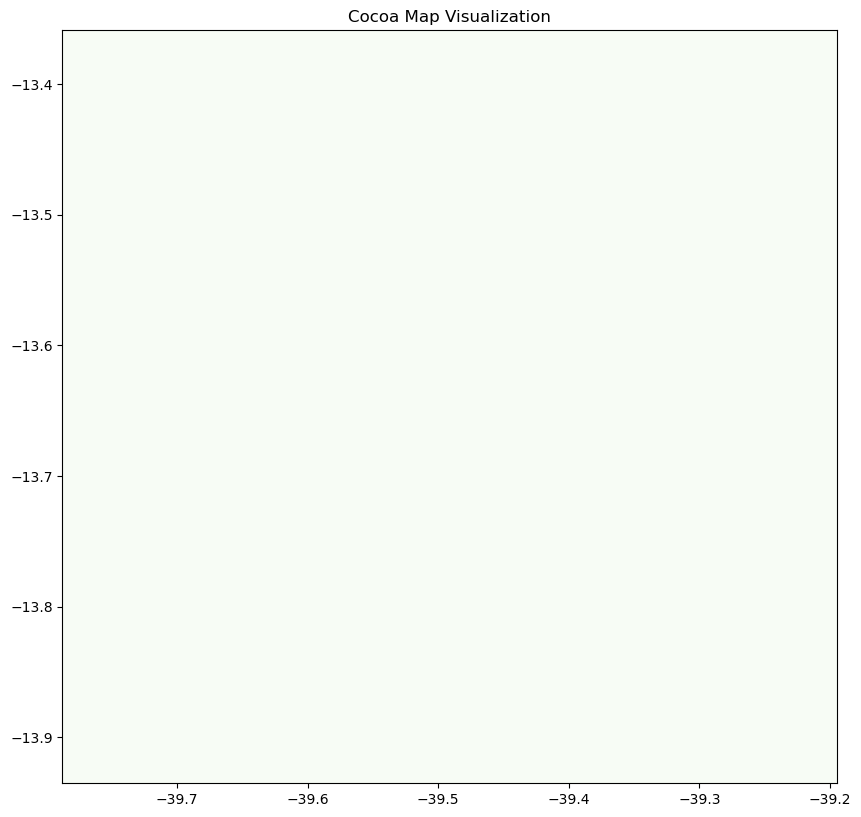

In [64]:
# 定义导出区域
region = buffer_geometry.bounds().getInfo()['coordinates']

# 获取图像的 URL
url = out_image1.getDownloadURL({
    'scale': 30,
    'region': region,
    'format': 'GEO_TIFF'
})

# 下载图像为 GeoTIFF 文件
response = requests.get(url)
with open('coco_map.tif', 'wb') as file:
    file.write(response.content)

# 使用 Rasterio 打开图像
with rasterio.open('coco_map.tif') as src:
    out_image1, out_transform1 = mask(src, [circle.geometry[0]], crop=True)

# 绘制图像
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
show(out_image1, transform=out_transform1, ax=ax, cmap='Greens')
plt.title('Cocoa Map Visualization')
plt.show()